# Earnings by College Major

This notebook will be centered around earnings and demographic data associated with various college majors

## Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Read in data and perform exploratory analysis

In [3]:
recent_grads=pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]
recent_grads.head(n=5)
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Clean data

In [4]:
raw_data_count= recent_grads.shape[0]
recent_grads= recent_grads.dropna()
clean_data_count=recent_grads.shape[0]

## Create Plots

Now that the data has been read in and rows with missing values removed, we can explore the relationships across various variables of interest with scatterplots. 

### Major Popularity and Median Salary

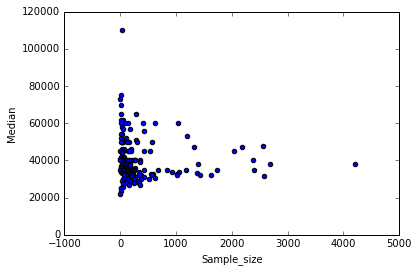

In [5]:
recent_grads.plot(x="Sample_size",y="Median", kind="scatter")

While these could be outliers, the highest values for salary are clustered around lower counts of students in that major, suggesting less popular majors command a higher salary

### Major Popularity and Unemployment Rate

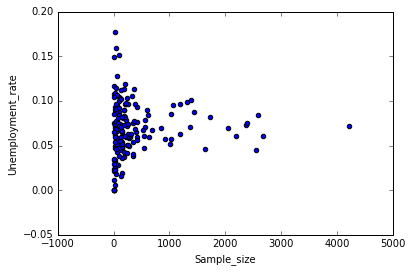

In [6]:
recent_grads.plot(x="Sample_size",y="Unemployment_rate", kind="scatter")

Looking at this graph, the overall unemployment rate goes roughly straight across when compared to sample size. 

### Amount of Graduates in Full time Work and Median Salary

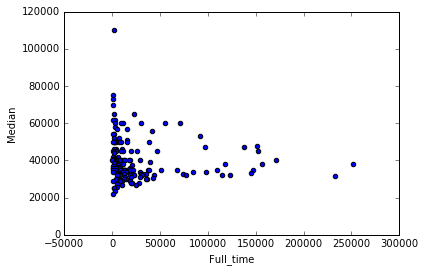

In [7]:
recent_grads.plot(x="Full_time",y="Median", kind="scatter")

Based on this chart, fulltime work is associated with a higher salary

### Relative Percentage of Women and Median Salary

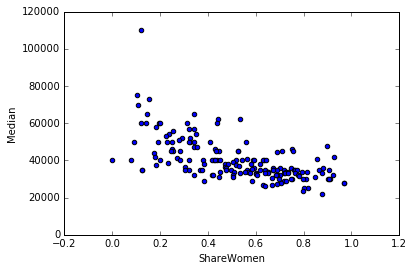

In [8]:
recent_grads.plot(x="ShareWomen",y="Median", kind="scatter")

According to this analysis, there is a slight negative correltion between the relative number of women in a major and the median salary

### Male Graduates and Median Salary

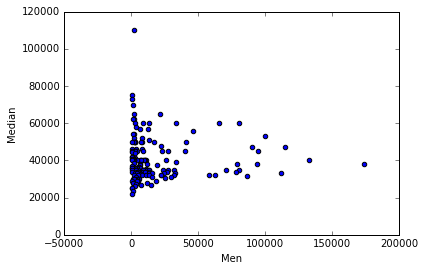

In [9]:
recent_grads.plot(x="Men",y="Median", kind="scatter")

### Female Graduates and Median Salary

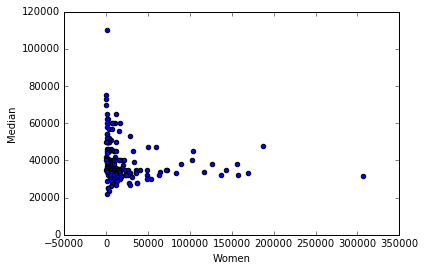

In [10]:
recent_grads.plot(x="Women",y="Median", kind="scatter")

## Create Histograms

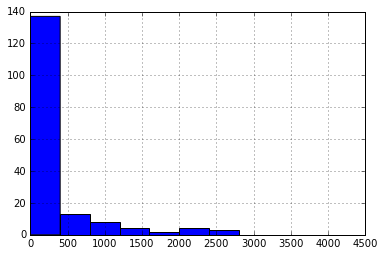

In [11]:
recent_grads['Sample_size'].hist(bins=10, range=(1,4000))

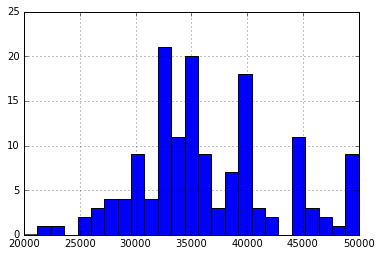

In [12]:
recent_grads['Median'].hist(bins=25, range=(20000,50000))

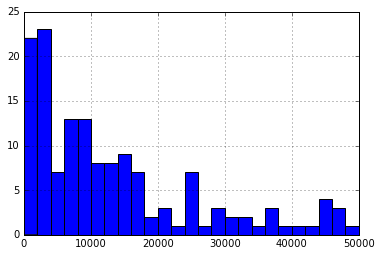

In [13]:
recent_grads['Employed'].hist(bins=25, range=(0,50000))

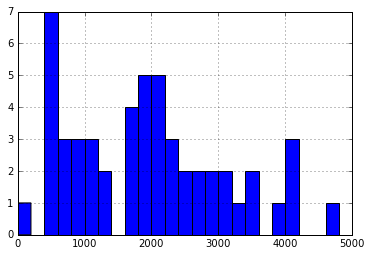

In [14]:
recent_grads['Full_time'].hist(bins=25, range=(0,5000))

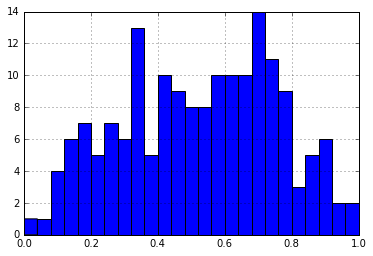

In [15]:
recent_grads['ShareWomen'].hist(bins=25, range=(0,1))

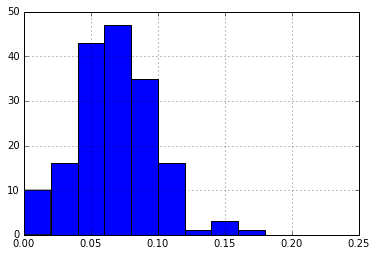

In [16]:
recent_grads['Unemployment_rate'].hist(bins=10, range=(0,0.2))

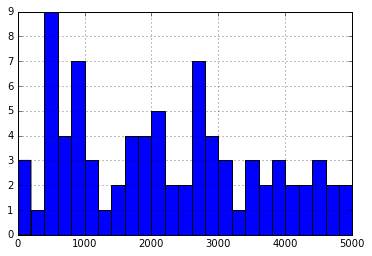

In [17]:
recent_grads['Men'].hist(bins=25, range=(0,5000))

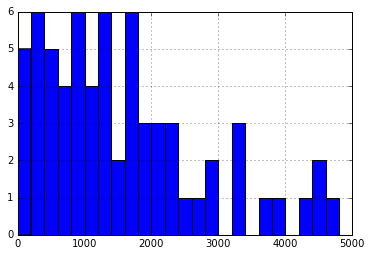

In [18]:
recent_grads['Women'].hist(bins=25, range=(0,5000))

## Scatter Matrices

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb84c73a58>,
      dtype=object)

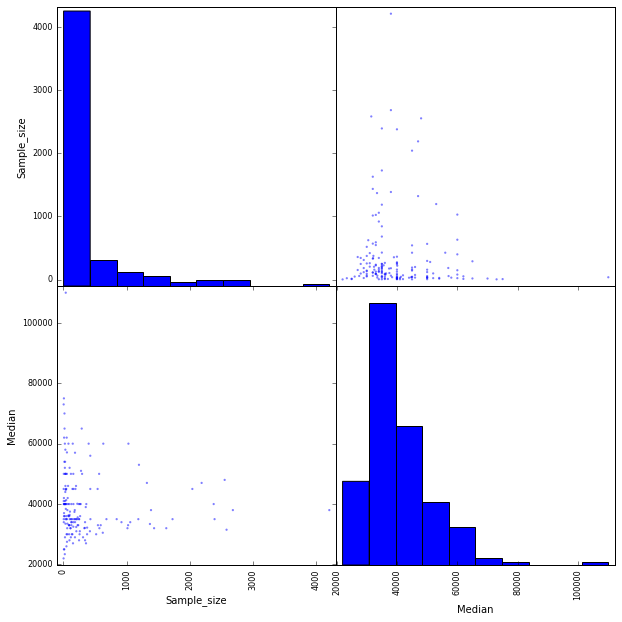

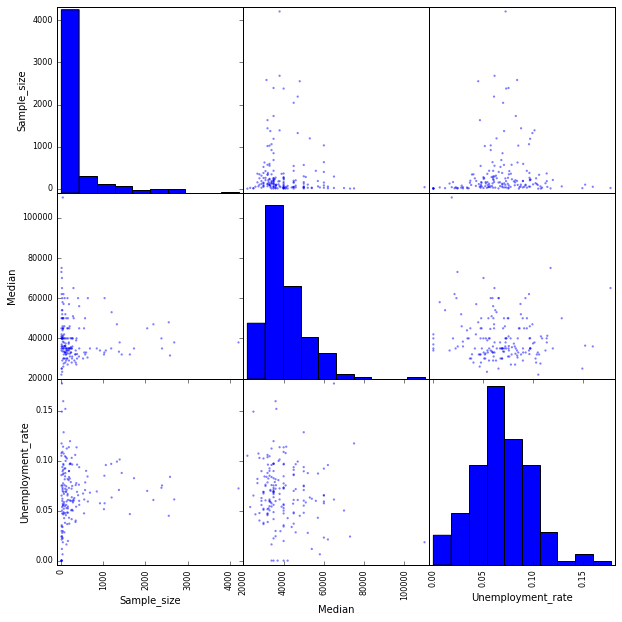

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))
scatter_matrix(recent_grads[['Sample_size', 'Median', "Unemployment_rate"]], figsize=(10,10))

## Bar Plots

### Major and share of women

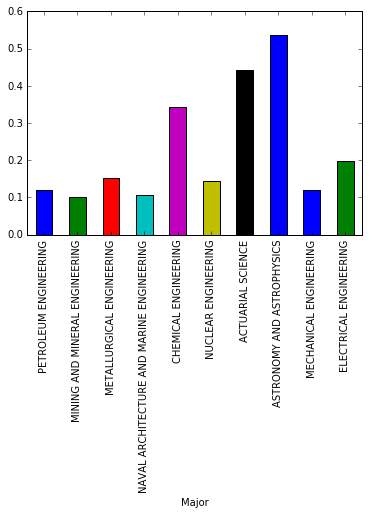

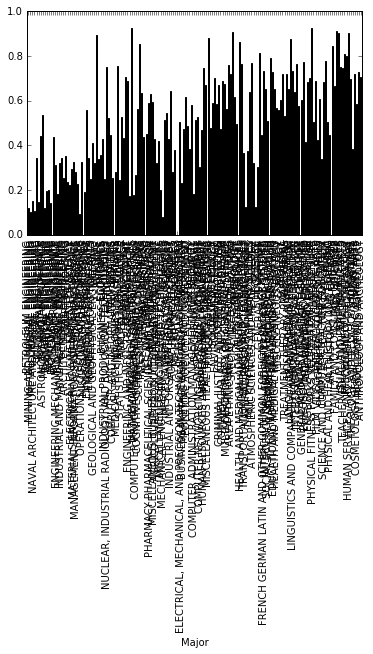

In [21]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[:-10].plot.bar(x='Major', y='ShareWomen', legend=False)

### Major and Unemployment Rate

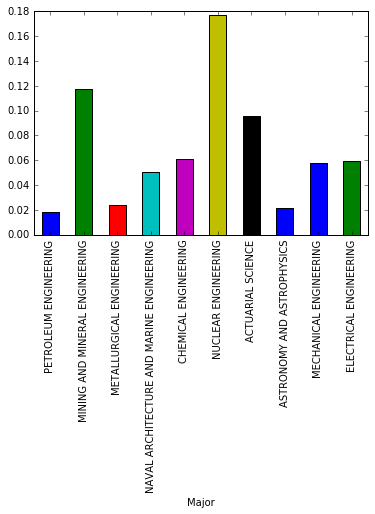

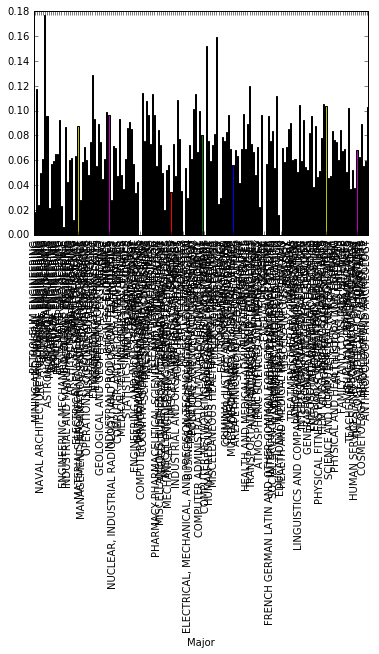

In [20]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[:-10].plot.bar(x='Major', y='Unemployment_rate', legend=False)